## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions

## Terminology
We first need to understand the difference between weak and strong learners in the context of ML:
   - **Weak learning** performs slightly better than guessing
   - **Strong learning** has high accuracy

## Boosting
1. When we discuss bossting we are refering to any Ensemble method that can combine several of these weak learner algorithyms into stronger learners. 


2. We do this by training our predictors sequentially (one after another), each trying to correct or focus more on its predecessor erros.


## Concepts

### Random Forest Full sized

In [3]:
np.random.seed(40)
# creating our dataset
df1 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),"Weight": np.random.randint(81,110,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.8,0.2], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.8,0.2], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.8,0.2], size=20)})

df2 = pd.DataFrame({'Chest_Pain': np.random.choice(['1', '0'],p = [0.2,0.8], size=20),"Weight": np.random.randint(40,80,20), 'High_colesterol': np.random.choice(['1', '0'],p = [0.3,0.7], size=20),
                   'Strong_Blood_circulation': np.random.choice(['1', '0'],p = [0.2,0.8], size=20), "Heart_disease":np.random.choice(['1', '0'], p = [0.2,0.8], size=20)})

rf = pd.concat([df1,df2],axis=0)
rf = rf.reset_index(drop=True)

# Sampling with replacement
bootstrapped = rf.sample(replace = True, n =40)
bootstrapped.head(5)

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease
8,1,84,1,1,1
24,0,69,1,1,0
17,1,83,1,1,1
24,0,69,1,1,0
3,1,86,0,0,1


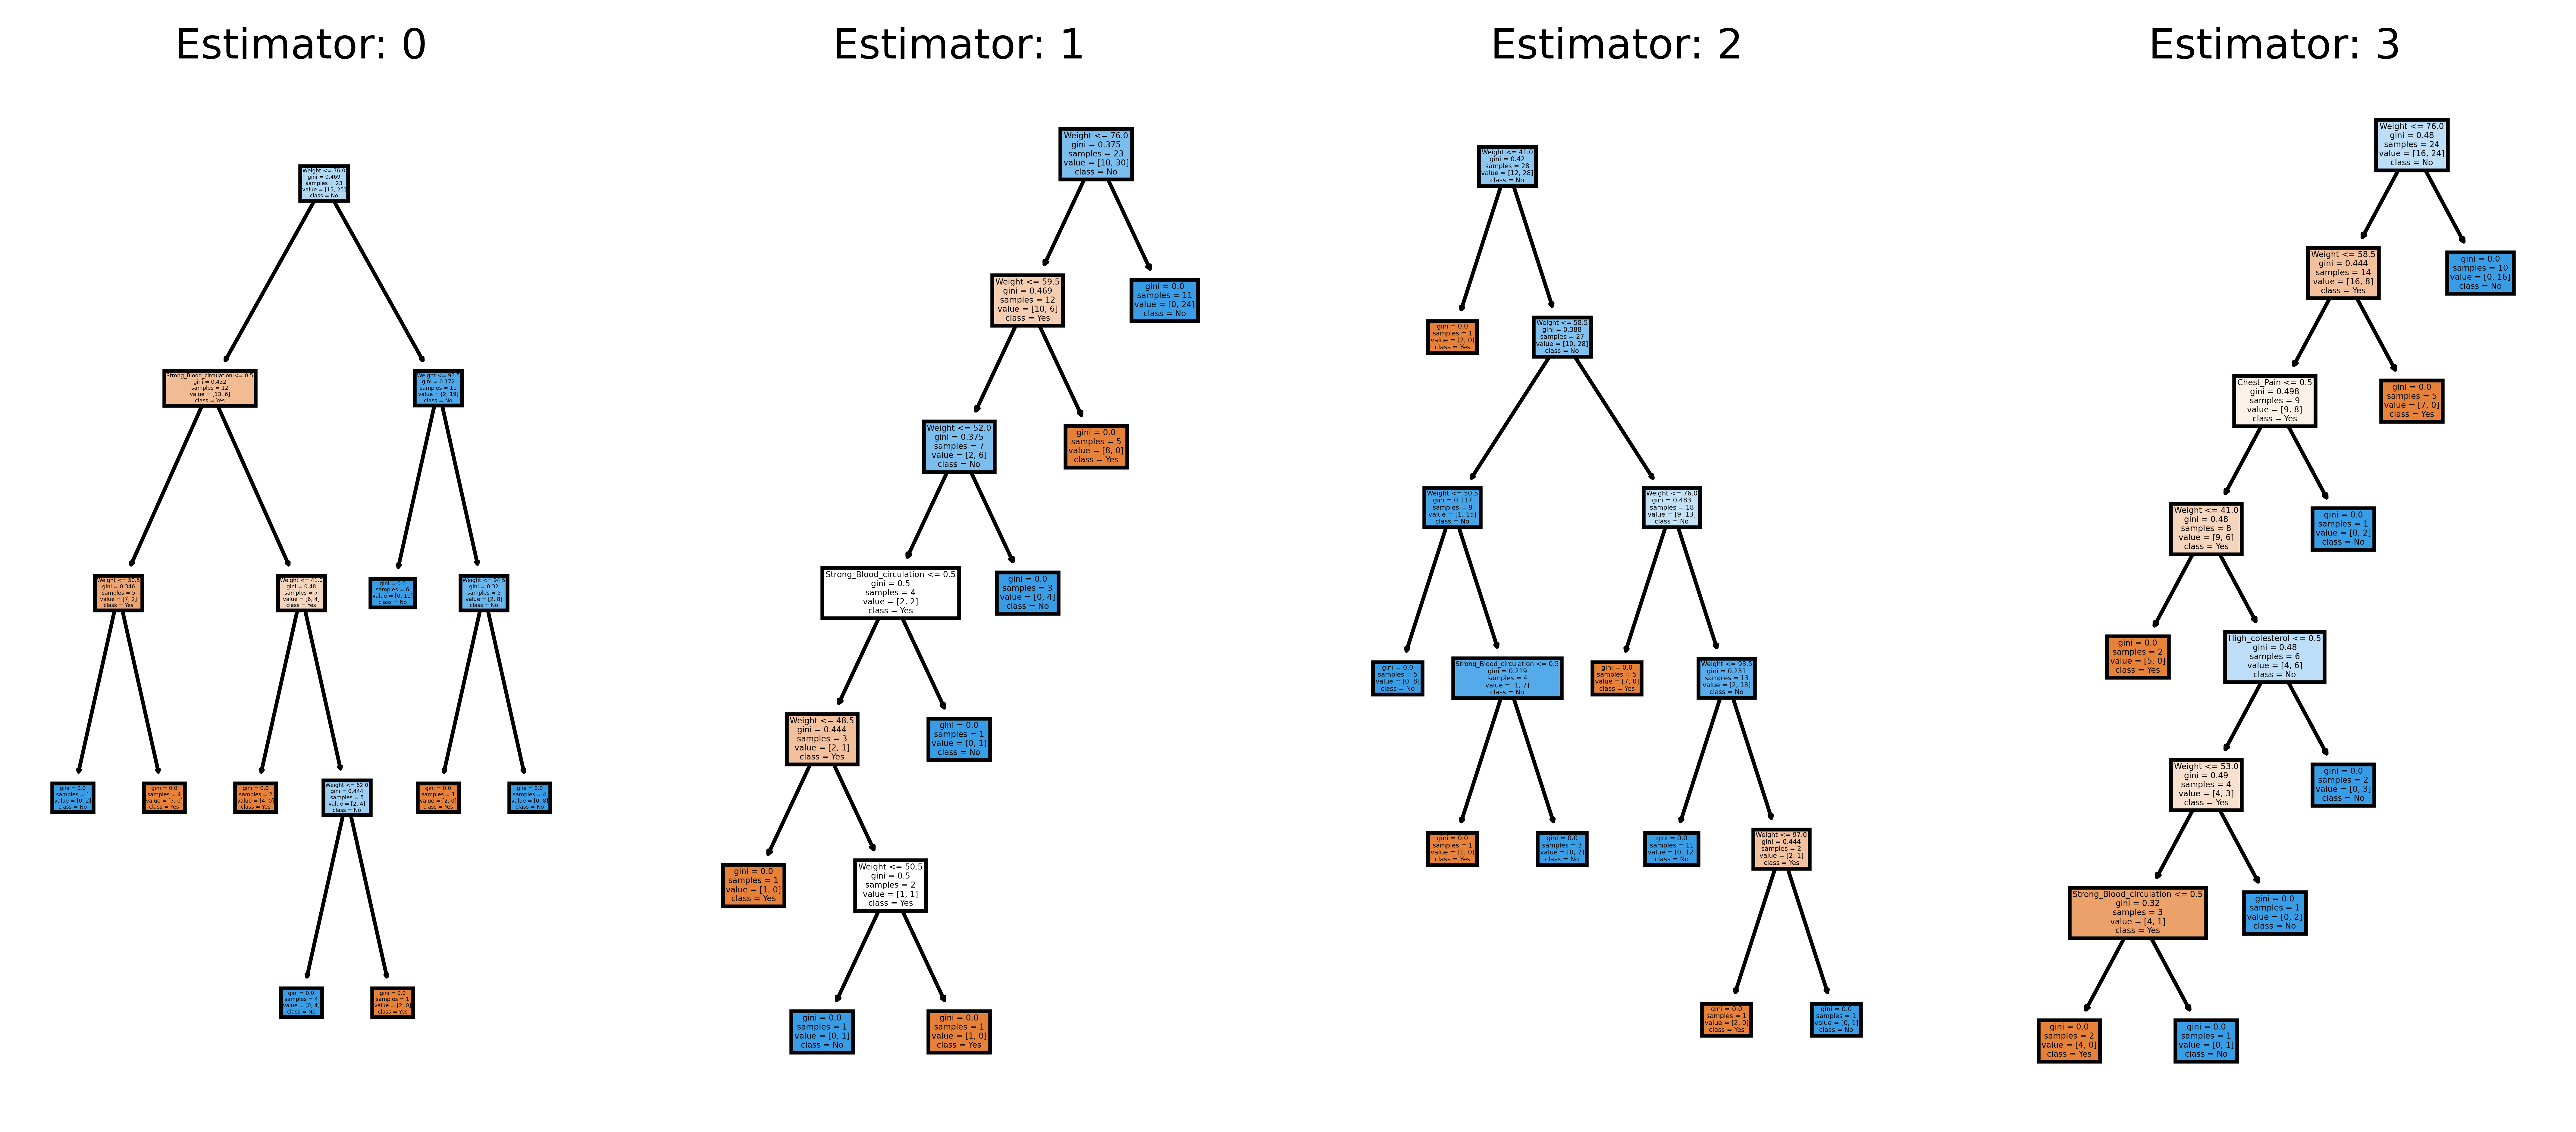

In [4]:
np.random.seed(4)

X = bootstrapped.drop('Heart_disease',axis=1).values
y = bootstrapped['Heart_disease'].values

fn=bootstrapped.columns
cn=['Yes','No']

clf = RandomForestClassifier()
clf = clf.fit(X,y)

fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   filled = True,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

## Adaboost Forests are usually just stumps 
1. Stumps are trees with a node and two leaves
2. These are weak learners
3. Unlike RF, with Adaboost some stumps are weighted in terms of voting
4. Unlike RF where each tree is independent, with Adaboost order is important
5. By paying more attention to the training instances that the predecessor underfitted a new predictor can correct its predecessor. Resultantly, new predictors focuse more and more on the hard cases. 
6. Building an AdaBoost classifier:

     - a first base classifier is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. 
     - A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

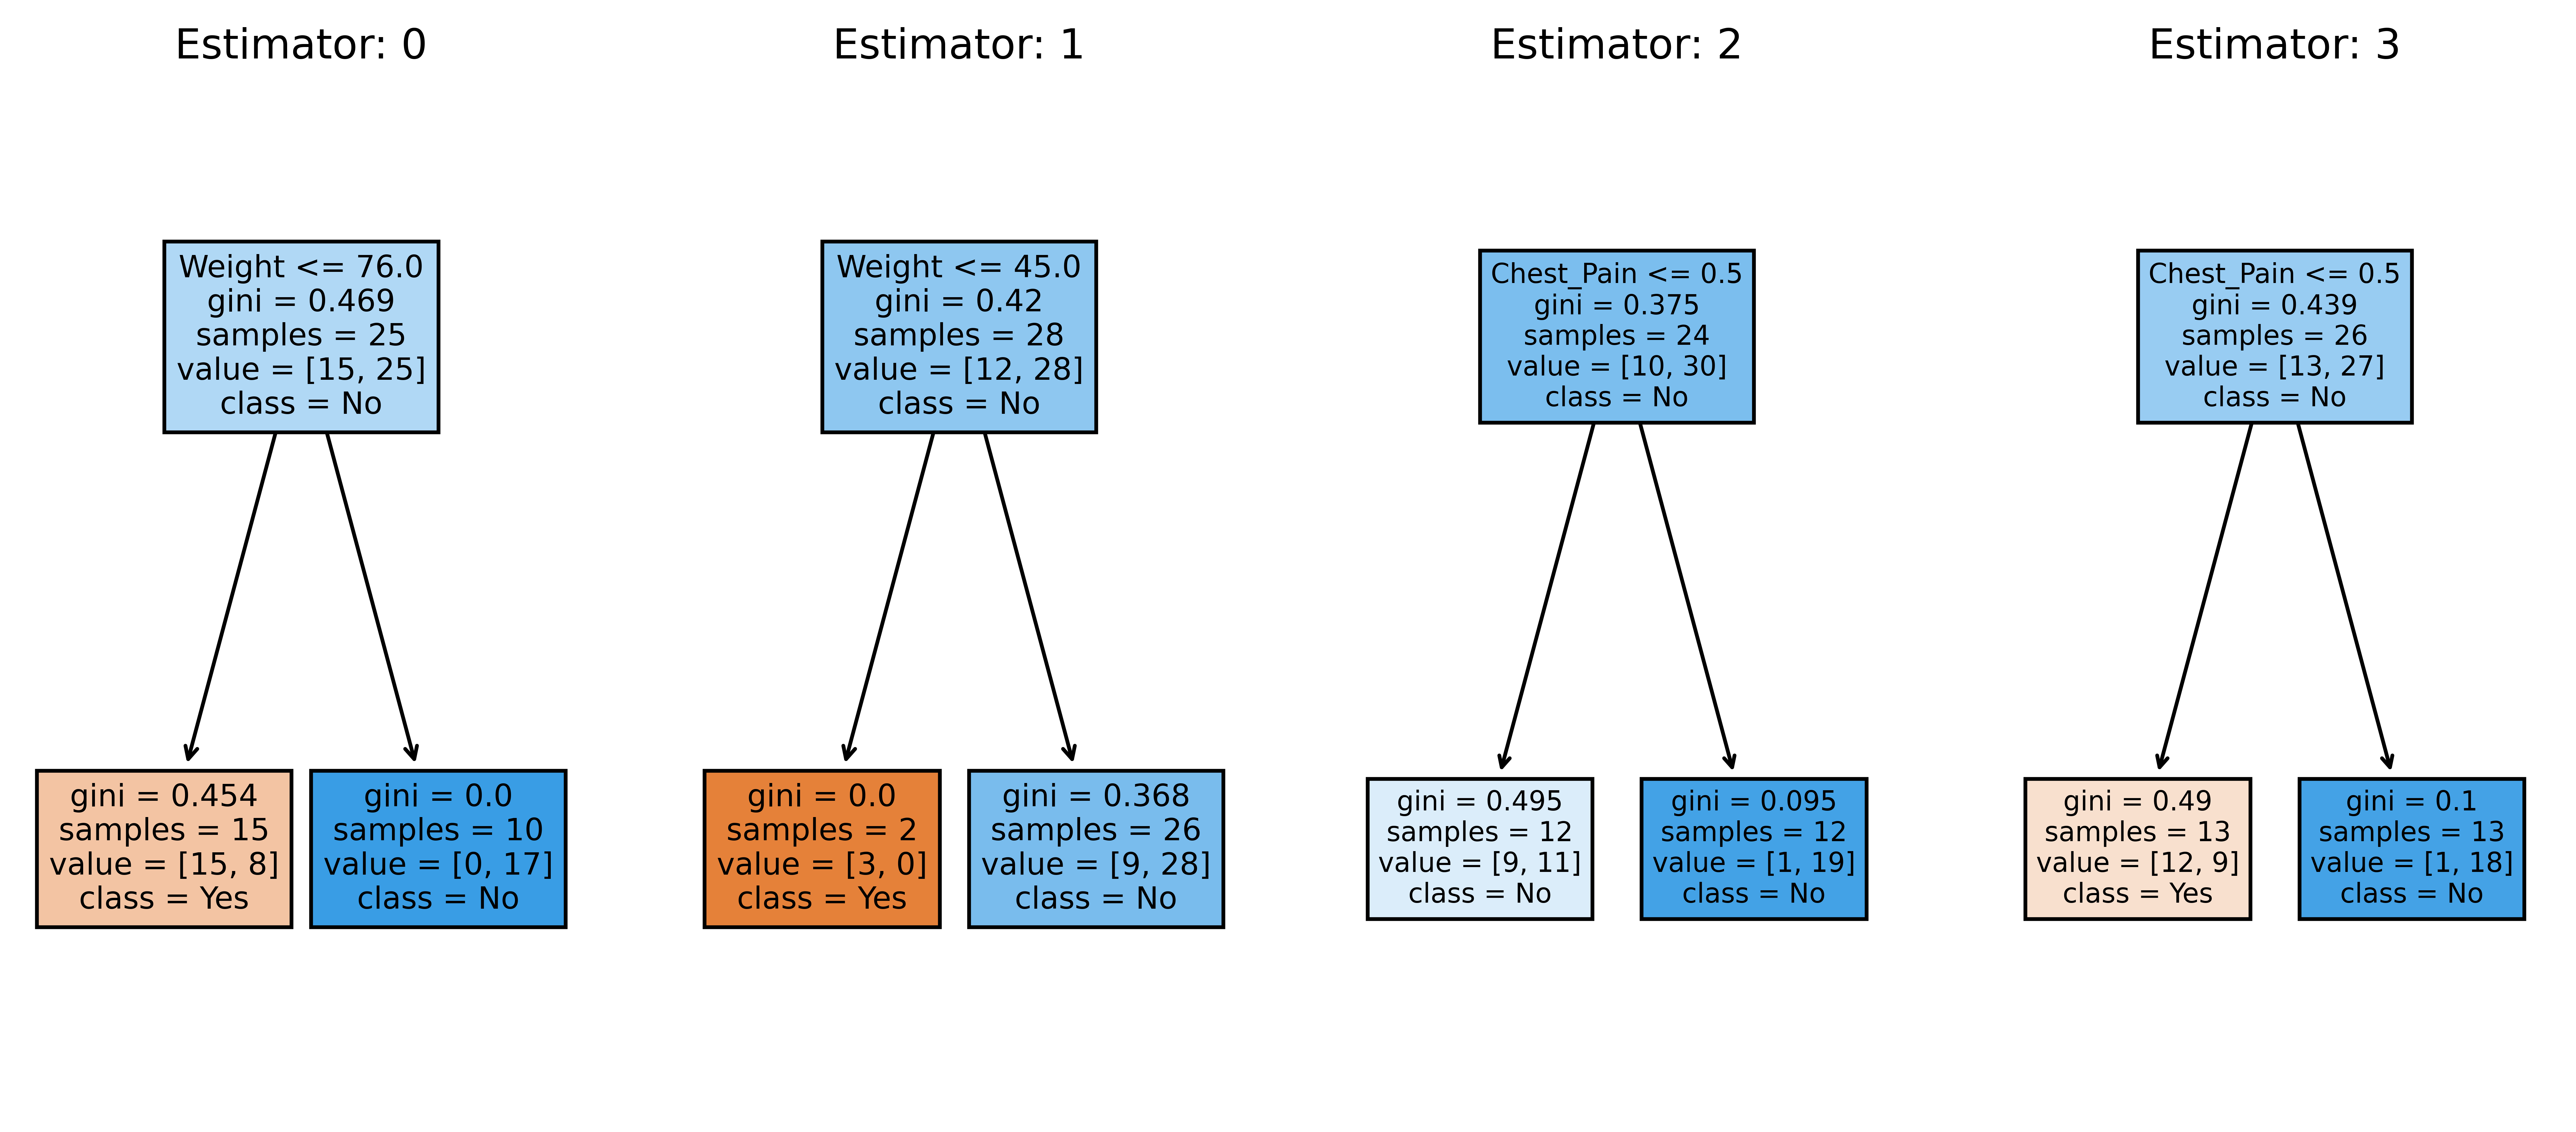

In [5]:

X = bootstrapped.drop('Heart_disease',axis=1).values
y = bootstrapped['Heart_disease'].values

fn=bootstrapped.columns
cn=['Yes','No']

clf = RandomForestClassifier(max_depth = 1)
clf = clf.fit(X,y)

fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   filled = True,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# AdaBoost algorithm

Weighted error rate of the $j^{th}$ predictor:

$$r_j = \frac{\sum_{\substack{
   i = 1 \\
   \hat{y}_j^{(i)} \neq y^{(i)}
  }}^{m} w^{(i)}}
  {\sum_{i=1}^{m}w^{(i)}}
  $$

where:

- $\hat{y}_j^{(i)}$y is the $j^{th}$ predictor’s prediction for the $i^{th}$ instance.

- Each instance weight w(i) is initially set to $\frac{1}{m}$



#### The predictor’s weight $α_j$ is then computed using the Equation: 

$$α_j=ηlog\frac{1-r_j}{r_j}$$


where:

- η is the learning rate hyperparameter
- The more accurate the predictor is, the higher its weight will be. 

##### Weight update rule



$$  w_i \gets
  \begin{cases}
    w_i      & \quad \text{if } \hat{y}_j^{(i)} = y^{(i)}\\
    w_i exp(\alpha_j)  & \quad \text{if } \hat{y}_j^{(i)} \neq y^{(i)}
  \end{cases}
$$

## Dataset

In [326]:
np.random.seed(45)
ada = rf.sample(replace = False, n =10)


# Each instance weight w(i) is initially set to 1/m
# However, after the first stump these weights change in order to guide the next stumps creation
ada['Sample_Weight'] = 1/len(ada)
ada

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease,Sample_Weight
5,1,99,1,1,1,0.1
13,1,106,1,1,1,0.1
7,1,107,1,1,1,0.1
0,1,100,1,0,1,0.1
37,0,55,0,1,1,0.1
20,0,41,0,0,0,0.1
9,1,109,1,1,0,0.1
19,1,93,1,1,1,0.1
35,0,40,1,1,0,0.1
39,1,50,0,0,1,0.1


# First stump in Our forest

1. Using the variable that does the best job classfying Heart Disease using the GINI Index (Look at my DT Notebook on this)
2. We need to determine how much say this stump has in our final decision based on how well it classified our samples

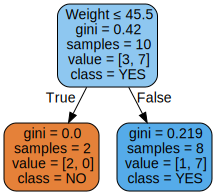

In [369]:
X1 = ada.drop(['Heart_disease','Sample_Weight'],axis=1).values
y1 = ada['Heart_disease'].values

fn=ada.columns[:-2]
cn=['NO','YES']

tree_classifier = DecisionTreeClassifier(max_depth = 1)
tree_classifier = tree_classifier.fit(X1,y1)

dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                     feature_names= fn,  
                     class_names=cn,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data)  

We can see in our right leaf our stump made 1 error

The total error for a stump is the sum of the weights associated with the incorrectly classified samples

In [332]:
ada['Weight'] = ada['Weight'].astype(float)
ada[(ada['Weight'] >=45.5)]

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease,Sample_Weight
5,1,99.0,1,1,1,0.1
13,1,106.0,1,1,1,0.1
7,1,107.0,1,1,1,0.1
0,1,100.0,1,0,1,0.1
37,0,55.0,0,1,1,0.1
9,1,109.0,1,1,0,0.1
19,1,93.0,1,1,1,0.1
39,1,50.0,0,0,1,0.1


In [333]:
# we can see that this data point was inncorrectly 
ada[(ada['Weight'] >=45.5) & (ada['Heart_disease'] == '0') ]

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease,Sample_Weight
9,1,109.0,1,1,0,0.1


## Inpterpretation
The Blue Line tells us the amount of say


When error is low we can see that total amount of say is high and vis versa

In [334]:
weighted_sum = 0.1*1
inncorrect_patients = (1-weighted_sum)/weighted_sum
error = 1/2*np.log(inncorrect_patients)
error

1.0986122886681098

Text(0.5, 1.0, 'Amount of Say')

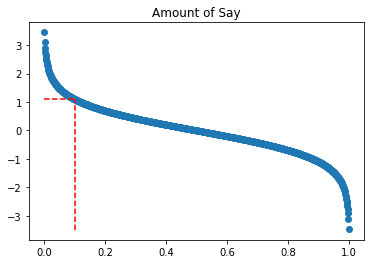

In [335]:
plt.scatter(total_error,a)
patient4Y = np.array([-3.5,1.0986122886681098])
patient4X = np.array([0.1,0.1])

patientX = np.array([0,0.1])
patienty = np.array([1.0986122886681098,1.0986122886681098])


plt.plot(patient4X,patient4Y,'r--')
plt.plot(patientX,patienty,'r--')
plt.title('Amount of Say')

## Example if we had used High_colesterol

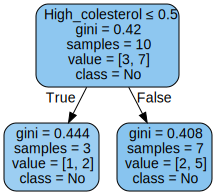

In [370]:
X = ada['High_colesterol'].values.reshape(-1,1)
y = ada['Heart_disease'].values

fn= ada.columns[2:3]
cn=['Yes','No']

tree_classifier = DecisionTreeClassifier(max_depth = 1)
tree_classifier = tree_classifier.fit(X,y)

dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                     feature_names= fn,  
                     class_names=cn,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data)  

In [337]:
weighted_sum = 0.1*3
inncorrect_patients = (1-weighted_sum)/weighted_sum
error = 1/2*np.log(inncorrect_patients)
error

0.4236489301936017

Text(0.5, 1.0, 'Amount of Say')

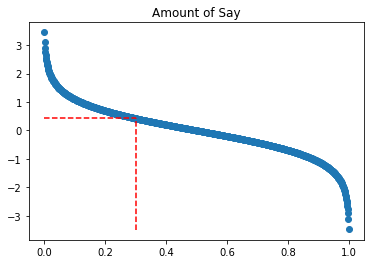

In [338]:
plt.scatter(total_error,a)
Y = np.array([-3.5,0.4236])
X = np.array([0.3,0.3])

X1 = np.array([0,0.3])
Y1 = np.array([0.4236,0.4236])


plt.plot(X,Y,'r--')
plt.plot(X1,Y1,'r--')
plt.title('Amount of Say')

In [339]:
import math
ada.loc[9,'Sample_Weight'] = 0.1*math.exp(1.0986122886681098)

ada.iloc[[0,1,2,3,4,5,7,8,9],-1] = 0.1*math.exp(-1.0986122886681098)

normaize = np.sum(ada['Sample_Weight'])

ada['Sample_Weight'] = ada['Sample_Weight']/normaize

In [340]:
ada

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease,Sample_Weight
5,1,99.0,1,1,1,0.055556
13,1,106.0,1,1,1,0.055556
7,1,107.0,1,1,1,0.055556
0,1,100.0,1,0,1,0.055556
37,0,55.0,0,1,1,0.055556
20,0,41.0,0,0,0,0.055556
9,1,109.0,1,1,0,0.500000
19,1,93.0,1,1,1,0.055556
35,0,40.0,1,1,0,0.055556
39,1,50.0,0,0,1,0.055556


## Second Stump
1. We can either use a weighted Gini Index 
2. Resample with our new weights 

In [355]:
weights = ada['Sample_Weight'].to_list()
np.random.seed(90)

new_ada = ada.sample(replace = True,weights = weights, n = 10)

In [356]:
# we can see index 9 had a higher weight and now it appears more in our new dataframe
new_ada

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease,Sample_Weight
7,1,107.0,1,1,1,0.055556
7,1,107.0,1,1,1,0.055556
39,1,50.0,0,0,1,0.055556
35,0,40.0,1,1,0,0.055556
0,1,100.0,1,0,1,0.055556
37,0,55.0,0,1,1,0.055556
9,1,109.0,1,1,0,0.500000
9,1,109.0,1,1,0,0.500000
37,0,55.0,0,1,1,0.055556
9,1,109.0,1,1,0,0.500000


In [357]:
# Bring our weights back to normal
new_ada['Sample_Weight'] = 1/len(new_ada)
new_ada

,Chest_Pain,Weight,High_colesterol,Strong_Blood_circulation,Heart_disease,Sample_Weight
7,1,107.0,1,1,1,0.1
7,1,107.0,1,1,1,0.1
39,1,50.0,0,0,1,0.1
35,0,40.0,1,1,0,0.1
0,1,100.0,1,0,1,0.1
37,0,55.0,0,1,1,0.1
9,1,109.0,1,1,0,0.1
9,1,109.0,1,1,0,0.1
37,0,55.0,0,1,1,0.1
9,1,109.0,1,1,0,0.1


## Visualize Second Tree

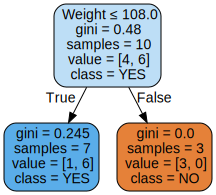

In [368]:
X = new_ada.drop(['Heart_disease','Sample_Weight'],axis=1).values
y = new_ada['Heart_disease'].values

fn=new_ada.columns[:-2]
cn=['NO','YES']

T_classifier = DecisionTreeClassifier(max_depth = 1)
T_classifier = T_classifier.fit(X,y)

dot_data = tree.export_graphviz(T_classifier, out_file=None, 
                     feature_names= fn,  
                     class_names=cn,  
                     filled=True, rounded=True,  
                    special_characters=True)  
graphviz.Source(dot_data)  

## Interpretation
We can see that our one missclassification has now been correctly classified but we have an incorrect classification in our left leaf

Our second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

## Scikit-Learn’s AdaBoostClassifier class

In [371]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5)
ada_clf.fit(X1, y1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

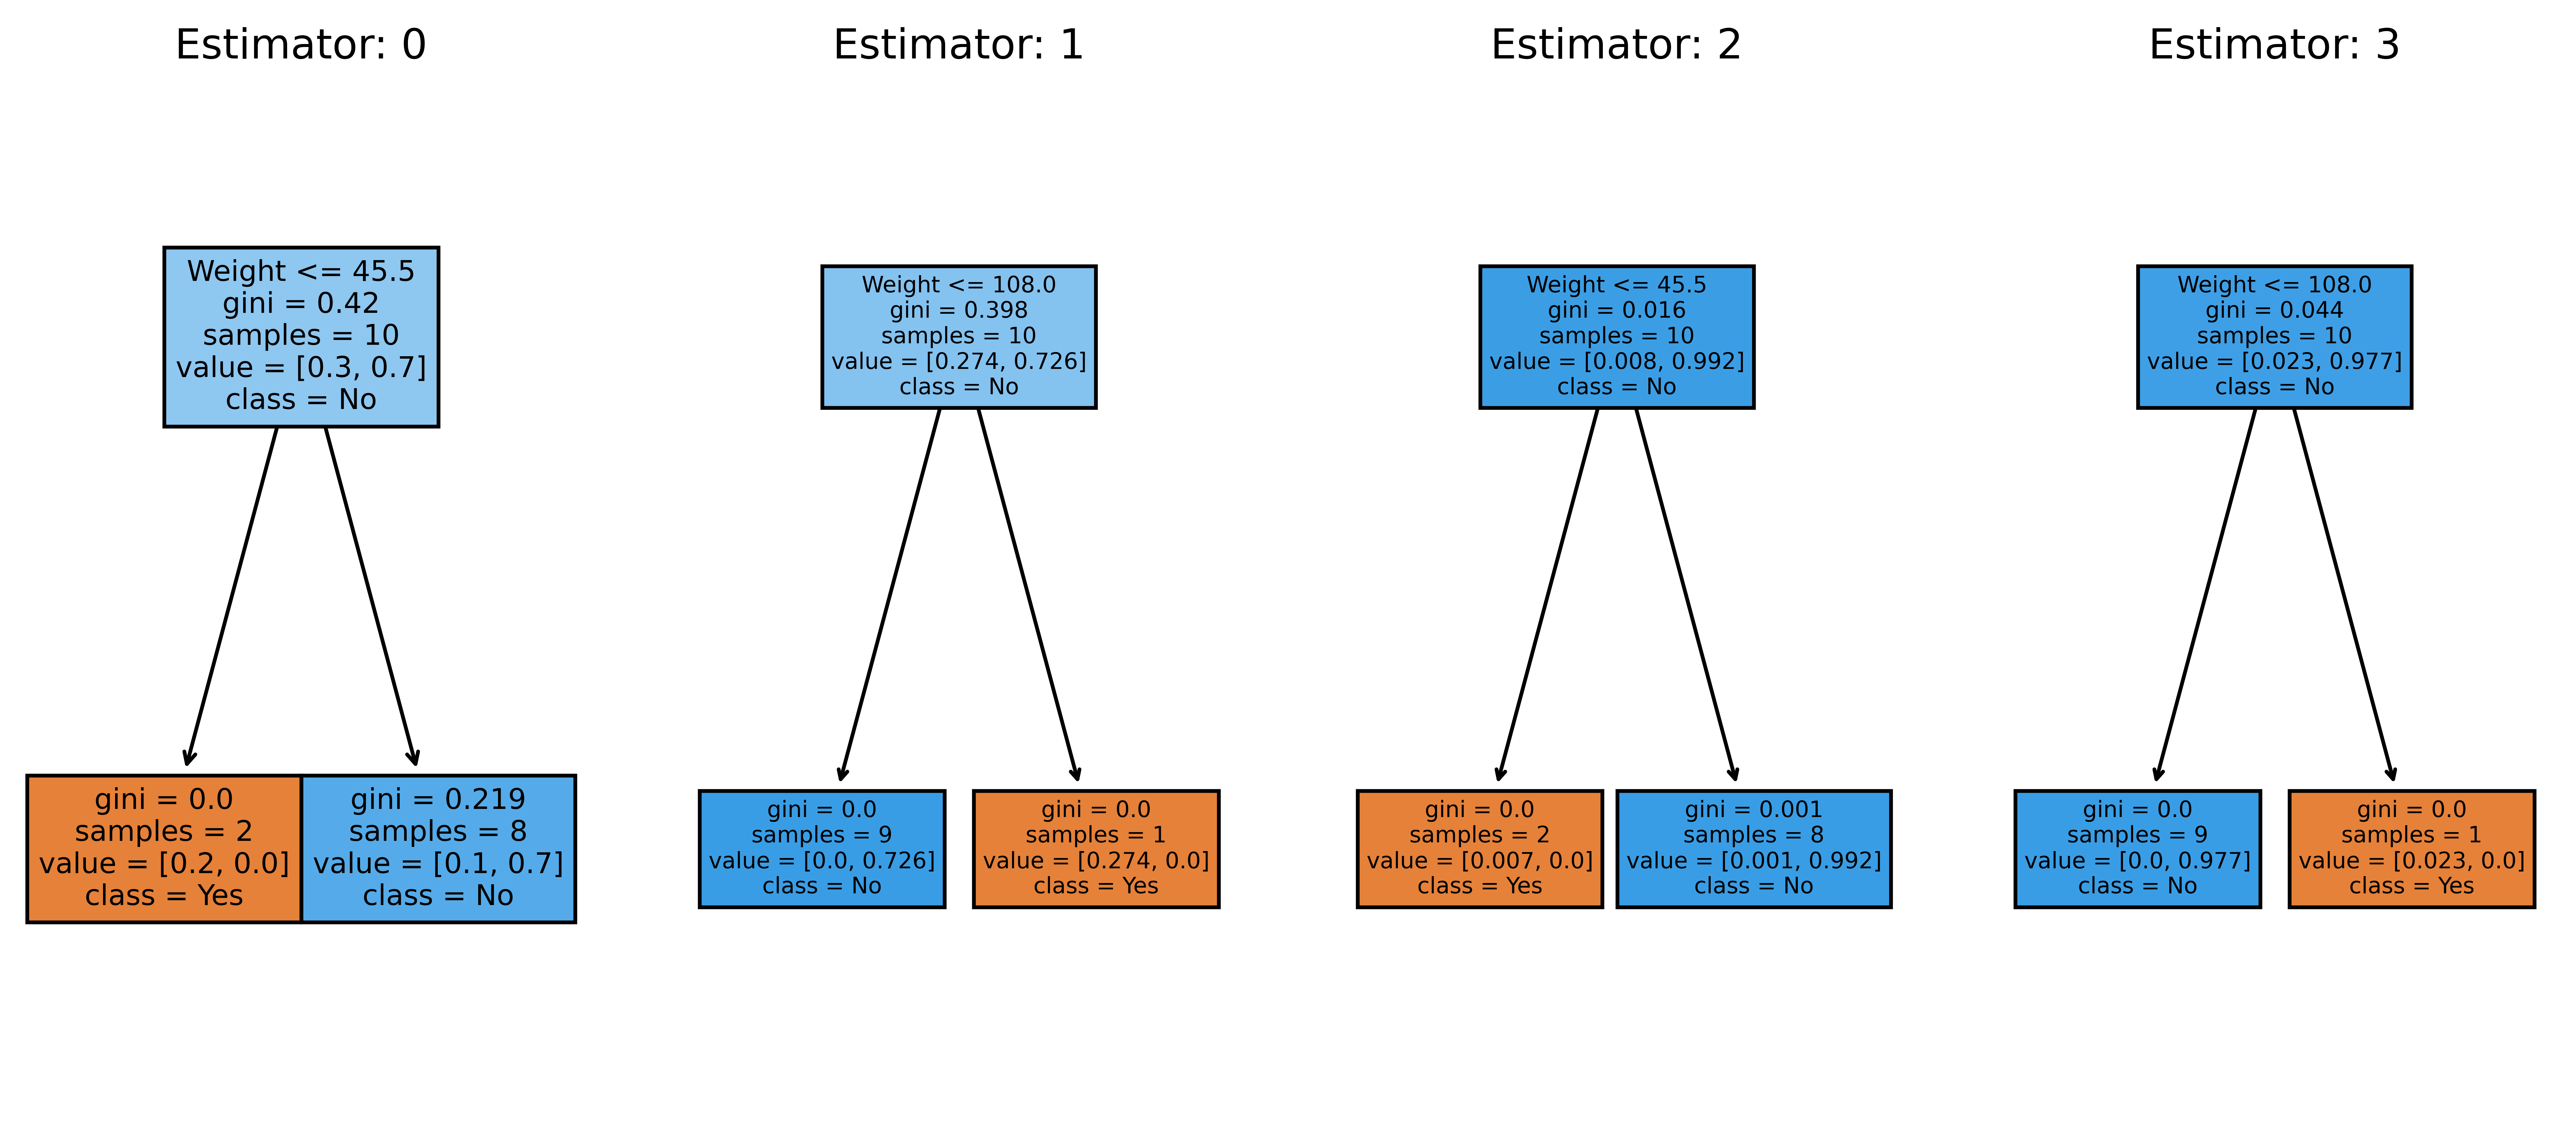

In [372]:
fn=ada.columns[:-2]
cn=['Yes','No']

fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(ada_clf.estimators_[index],
                   filled = True,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

## Interpretation 

We can see that our first two stumps are exactly what we calculated for our first and second stump